In [1]:
%pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install qiskit-ibm-runtime
%pip install 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from fractions import Fraction 

psi = Statevector.from_label('0').tensor(Statevector ([1/12, 1/4])) + Statevector.from_label('1').tensor(Statevector ([1/3, 1/3]))
display(psi.draw('latex'))

# First system can be isolated in the following way. 
# find probabillity of measuring 0 in the first system
# and for ket 0 in 2nd ystem. 
# the state becomes ( ket(0)/12 + ket(1)/4) tensor ket0
# the probabillity of measuring ket 0 in the second system is 1/3 + 1/12 = 5/12
# the probabillity of measuring ket 1 in the second system is 1/4 + 1/3 = 7/12
# the probabillity of measuring ket 0 in the first system is 1/3

<IPython.core.display.Latex object>

In [4]:
#using tensor function
from math import sqrt
psi1 = Statevector.from_label('0') ^ Statevector.from_label('1')
psi2 = Statevector.from_label('0') ^ Statevector.from_label('+')

display(psi1.draw('latex'))
display(psi2.draw('latex'))

psi3 = Statevector.from_label('0') ^ Statevector([1/sqrt(2), 1/sqrt(2)])
display(psi3.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
from qiskit.quantum_info import Operator

x = Operator.from_label('X')
h = Operator.from_label('H')

compositexh = x.tensor(h) 
compositexi = x.tensor(Operator.from_label('I'))

display(compositexh.draw('latex'))
display(compositexi.draw('latex'))

# the evolution of state vector with xi composite is 
psi3_evolved = psi3.evolve(compositexi)
# For comparison here is the original state vector
display(psi3.draw('latex'))
print("and the evolved is")
display(psi3_evolved.draw('latex'))
# As we see that the first qubit has been flipped but 2nd qubit is left alone 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and the evolved is


<IPython.core.display.Latex object>

In [6]:
# To calculate the unitary operator u = XZH 
z = Operator.from_label('Z')
u = x.tensor(z).tensor(h) 


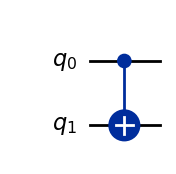

In [7]:
# Multi qubit gates 
# cnot gate
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')
display(qc.draw('mpl'))
# keep in mind that the control qubit is the first qubit and the target qubit is the second qubit
# and that qubits are numbered from right to left. so |01> where 1 is the first qubit and 0 the second. 
# the cnot gate flips the second qubit if the first qubit is 1.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

False


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/transforms.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


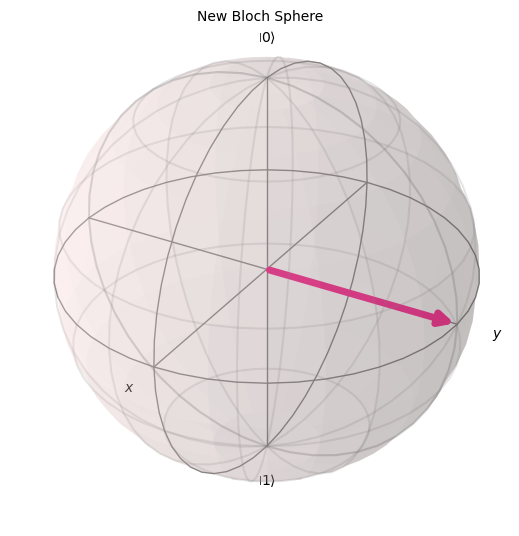

In [8]:
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_vector

# testing with superposition state 
qc = QuantumCircuit(2) 
qc.h(0)
qc.draw('mpl')
ket0 = Statevector.from_label('0')
ket1 = Statevector.from_label('0')
ket = ket1.evolve(qc) 

final_state = ket.tensor(ket1)
display(final_state.draw('latex'))
# bloch sphere
from qiskit.visualization import plot_bloch_vector
psi = Statevector([1,0,0])
psi1 = Statevector([0,1,0])
sup = psi + psi1
sup = sup/sup.inner(sup)
display(sup.draw('latex'))
print(sup.is_valid())
plot_bloch_vector(psi1, title="New Bloch Sphere")


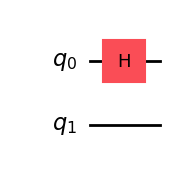

In [9]:
# Creating a circuit that creates bell states 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_qsphere

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl')

## Multi Qubits section. 
# Seeing how the tensor product is taken.

In [12]:
from qiskit.quantum_info import Statevector 
from numpy import sqrt 

#define state vectors or basis vectors 
zero = Statevector.from_label('0')
one = Statevector.from_label('1')
psi = zero.tensor(one)
display(psi.draw('latex'))

# Or having a tenso between 1 and + giving us two states. with 00 and 01 = 0
plus = Statevector.from_label('+')
psi = one.tensor(plus)
display(psi.draw('latex'))

# or having  4 states in psi. 
psi = plus.tensor(plus) 
display(psi.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Generating a controlled X gate (CX) gate manually and compare with given by library. 

In [52]:
import numpy as np
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import UnitaryGate
from qiskit import QuantumCircuit

# Define computational basis states |0><0| and |1><1| as outer products
zero = np.array([1, 0])  # |0>
one = np.array([0, 1])   # |1>

outer_zero = np.outer(zero, zero.conj())  # |0><0|
outer_one = np.outer(one, one.conj())    # |1><1|

# Define identity operator and Pauli-X gate
identity = np.eye(2)  # 2x2 Identity matrix
x = np.array([[0, 1], [1, 0]])  # Pauli-X gate

# Construct controlled-X as |0><0| ⊗ I + |1><1| ⊗ X
controlled_x = np.kron(outer_zero, identity) + np.kron(outer_one, x)

# Create a UnitaryGate for the custom CX
cx_custom = UnitaryGate(controlled_x, label='CX_Custom')
cx_custom_matrix = cx_custom.to_matrix()
print("What i generated")
display(cx_custom_matrix)

# Or we can do the following to define. 
# CX = Operator(
#     [[1, 0, 0, 0],
#      [0, 1, 0, 0],
#      [0, 0, 0, 1],
#      [0, 0, 1, 0]])

# Create a quantum circuit and add the custom CX gate
qc = QuantumCircuit(2)
qc.append(cx_custom, [0, 1])  # Control qubit 0, target qubit 1

# Passing data from it to see it acts as expected 
zero = Statevector.from_label('0')
one = Statevector.from_label('1')

# Initialize the state to |01>
psi = zero.tensor(one)
psi_evolved = psi.evolve(cx_custom)
# We get |01> -> |01> as expected because the controlled bit is 0 target bit is unchanged. 
psi2 = one.tensor(one)
psi2_evolved = psi2.evolve(cx_custom)
print("Evolved state with custom CX with |01> as state")
display(psi_evolved.draw('latex'))
# We get |11> -> |10> as expected because the controlled bit is 1 target bit is flipped.

# doing it the short way as expected. 
myQc = QuantumCircuit(2)
myQc.cx(0,1)  # Control qubit 0, target qubit 1
psi_evolved2 = psi.evolve(myQc)
print("Evolved state with qiskit CX with |01>")
display(psi_evolved2.draw('latex'))
# Not working as expected. If i give it |01> it should give |01> but it gives |11>
# This is because the qiskit uses the qubits from right to left. and left one being q0 
# so changing the qubits to |10> will give |11> as expected.

# this means that qubit to left is now 0 and to the right is 1 
# But it still shows as |01> because the qubits are numbered from right to left.

print("Evolved state with qiskit CX with |10>")
psi_evolved2 = psi2.evolve(qc)
display(psi_evolved2.draw('latex'))


# So as expected it counts from right to left with right most being q0 or first bit. 


What i generated


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

Evolved state with custom CX with |01> as state


<IPython.core.display.Latex object>

Evolved state with qiskit CX with |01>


<IPython.core.display.Latex object>

Evolved state with qiskit CX with |10>


<IPython.core.display.Latex object>